In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import pickle
from IPython.display import display

It is important to note that SGP4 returns velocity in km/s and position in km

In [2]:
with open('data_df_states.pkl', 'rb') as f: 
    data_df = pickle.load(f)
data_df

,COMMENT,ORIGINATOR,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,CLASSIFICATION_TYPE,INTLDES,EPOCH,EPOCH_MICROSECONDS,MEAN_MOTION,...,PERIOD,APOGEE,PERIGEE,DECAYED,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z
0,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-19 04:33:04,103712,15.50287953,...,92.886,418.859,412.914,0,-6716.464805,1010.498823,-0.619780,-0.702872,-4.703268,6.012037
1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 16:10:27,894144,15.50261374,...,92.888,418.933,412.995,0,-6754.588368,713.612739,-5.372314,-0.499248,-4.729156,6.011959
2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 13:04:48,719712,15.50255355,...,92.888,418.937,413.027,0,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 13:04:48,719712,15.50255355,...,92.888,418.937,413.027,0,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2025-02-18 08:50:51,404064,15.50242656,...,92.889,418.777,413.261,0,285.606563,-4232.873367,5299.590150,7.641703,-0.169388,-0.542461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 10:40:36,430176,15.48912972,...,92.968,423.263,416.551,0,-5295.206939,-2989.852258,3032.774513,0.457275,-5.842257,-4.935927
9996,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 09:11:35,60352,15.48913193,...,92.968,423.263,416.549,0,-4983.780044,-4262.942739,1789.202874,2.020125,-4.753728,-5.657020
9997,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 05:13:34,135680,15.48910863,...,92.969,423.309,416.517,0,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753
9998,GENERATED VIA SPACETRACK.ORG API,18 SPCS,25544,ISS (ZARYA),PAYLOAD,U,98067A,2020-03-23 05:13:34,135680,15.48910863,...,92.969,423.309,416.517,0,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753


Drop Rows with Missing State Vectors. Can't train/analyze with NAANs.
Drop Name Values

In [3]:
data_df_dropped = data_df.dropna(subset=['position_x', 'position_y', 'position_z', 'velocity_x', 'velocity_y', 
                                         'velocity_z'])
def drop_single_value_columns(df):
    temp = []
    for col in df.columns:
        if len(df[col].unique())<2:
            temp.append(col)
    df = df.drop(columns=temp)
    return df
data_df_dropped = drop_single_value_columns(data_df_dropped)
data_df_dropped

,EPOCH,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,...,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z
0,2025-02-19 04:33:04,103712,15.50287953,0.0004375,51.6362,171.4481,335.7698,24.3085,49686,0.00041201,...,6794.022,92.886,418.859,412.914,-6716.464805,1010.498823,-0.619780,-0.702872,-4.703268,6.012037
1,2025-02-18 16:10:27,894144,15.50261374,0.000437,51.6362,174.005,333.8498,26.227,49678,0.00033537,...,6794.099,92.888,418.933,412.995,-6754.588368,713.612739,-5.372314,-0.499248,-4.729156,6.011959
2,2025-02-18 13:04:48,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,...,6794.117,92.888,418.937,413.027,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
3,2025-02-18 13:04:48,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,...,6794.117,92.888,418.937,413.027,-6762.257478,637.531540,-4.332367,-0.445122,-4.734508,6.011920
4,2025-02-18 08:50:51,404064,15.50242656,0.000406,51.6389,175.5124,333.0365,122.1476,49673,0.00030289,...,6794.154,92.889,418.777,413.261,285.606563,-4232.873367,5299.590150,7.641703,-0.169388,-0.542461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-03-23 10:40:36,430176,15.48912972,0.0004937,51.6446,52.7127,46.5882,98.6053,21872,0.000032484,...,6798.042,92.968,423.263,416.551,-5295.206939,-2989.852258,3032.774513,0.457275,-5.842257,-4.935927
9996,2020-03-23 09:11:35,60352,15.48913193,0.0004938,51.6445,53.0191,46.5566,113.6882,21871,0.000034984,...,6798.041,92.968,423.263,416.549,-4983.780044,-4262.942739,1789.202874,2.020125,-4.753728,-5.657020
9997,2020-03-23 05:13:34,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,...,6798.048,92.969,423.309,416.517,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753
9998,2020-03-23 05:13:34,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,...,6798.048,92.969,423.309,416.517,5263.249851,2396.722319,-3580.001735,0.186781,6.222535,4.452753


Convert datetime to UNIX time

In [4]:
data_df_dropped['EPOCH']=pd.to_datetime(data_df_dropped['EPOCH']) #ensure datetime
#convert epoch to unix timestamp for later normalization
data_df_dropped['UNIX_TIMESTAMP'] = data_df_dropped['EPOCH'].apply(lambda x: x.timestamp())
data_df = data_df_dropped.drop(columns=['EPOCH', 'TLE_LINE1', 'TLE_LINE2'])

#compute magnitudes and changes to velocity and position vectors
data_df['position_magnitude'] = np.linalg.norm(data_df[['position_x', 'position_y', 'position_z']].values,axis=1)
data_df['velocity_magnitude'] = np.linalg.norm(data_df[['velocity_x', 'velocity_y', 'velocity_z']].values,axis=1)
data_df['delta_position'] = data_df['position_magnitude'].diff()
data_df['delta_velocity'] = data_df['velocity_magnitude'].diff()
data_df = data_df.dropna() #drop NAANs just in case
data_df

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,position_y,position_z,velocity_x,velocity_y,velocity_z,UNIX_TIMESTAMP,position_magnitude,velocity_magnitude,delta_position,delta_velocity
1,894144,15.50261374,0.000437,51.6362,174.005,333.8498,26.227,49678,0.00033537,0.0001891,...,713.612739,-5.372314,-0.499248,-4.729156,6.011959,1.739895e+09,6792.181978,7.665365,0.127228,-0.000100
2,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,0.00019261,...,637.531540,-4.332367,-0.445122,-4.734508,6.011920,1.739884e+09,6792.244948,7.665304,0.062970,-0.000061
3,719712,15.50255355,0.0004349,51.6363,174.6431,332.4152,27.6605,49676,0.0003415,0.00019261,...,637.531540,-4.332367,-0.445122,-4.734508,6.011920,1.739884e+09,6792.244948,7.665304,0.000000,0.000000
4,404064,15.50242656,0.000406,51.6389,175.5124,333.0365,122.1476,49673,0.00030289,0.00017018,...,-4232.873367,5299.590150,7.641703,-0.169388,-0.542461,1.739869e+09,6788.552409,7.662805,-3.692539,-0.002498
5,645824,15.50243123,0.0004289,51.6364,176.2407,330.6557,29.4191,49671,0.00036583,0.00020661,...,448.402562,-3.878178,-0.312362,-4.745038,6.011843,1.739856e+09,6792.359109,7.665195,3.806700,0.002390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,430176,15.48912972,0.0004937,51.6446,52.7127,46.5882,98.6053,21872,0.000032484,0.00001334,...,-2989.852258,3032.774513,0.457275,-5.842257,-4.935927,1.584960e+09,6795.303842,7.661883,-3.900619,0.002975
9996,60352,15.48913193,0.0004938,51.6445,53.0191,46.5566,113.6882,21871,0.000034984,0.00001471,...,-4262.942739,1789.202874,2.020125,-4.753728,-5.657020,1.584955e+09,6797.940221,7.660333,2.636380,-0.001549
9997,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,0.00000946,...,2396.722319,-3580.001735,0.186781,6.222535,4.452753,1.584940e+09,6801.653423,7.653877,3.713202,-0.006457
9998,135680,15.48910863,0.0004996,51.6447,53.8368,44.9382,273.0309,21868,0.000025424,0.00000946,...,2396.722319,-3580.001735,0.186781,6.222535,4.452753,1.584940e+09,6801.653423,7.653877,0.000000,0.000000


Remove unphysical values (i.e. velocity magnitudes > escape velocity) \
Escape velocity: ~11.186 km/s \
Max possible distance from Earth's center to remain in orbit: ~42,000 km


In [5]:
#After a quick look at our data table, data_df has only physical values for delta_vel and delta_position
#However we keep this function if needed for other datasets. 

# def del_unphysical(df, max_orbit, escape_vel):
#     df_filtered = df[df['delta_vel'] <= escape_vel & df['delta_position'] <= max_orbit]
#     return df_filtered
# data_df = del_unphysical(data_df)

Use z-score normalization

In [6]:
from sklearn.preprocessing import StandardScaler

def norm_data(data):
    
    scaler = StandardScaler()
    scaler.fit(data_df)
    data_normed = scaler.transform(data_df) #normalized our data table for later analysis. 
    data_normed_df = pd.DataFrame(data_normed, columns = data_df.columns)
    return data_normed_df

data_normed_df = norm_data(data_df)

Compute Z-score for magnitudes and deltas

In [7]:
#Compute z-score to identify anomalies in our data
def compute_zscore_anomalies(data_normed):
    data_normed_df_zscore = data_normed

    position_mag = data_normed_df_zscore['position_magnitude']
    mean = np.mean(position_mag)
    std_dev = np.std(position_mag)
    data_normed_df_zscore['z_score_position_magnitude'] = (data_normed_df_zscore['position_magnitude']-mean) / std_dev

    velocity_mag = data_normed_df_zscore['velocity_magnitude']
    mean = np.mean(velocity_mag)
    std_dev = np.std(velocity_mag)
    data_normed_df_zscore['z_score_velocity_magnitude'] = (data_normed_df_zscore['velocity_magnitude']-mean) / std_dev

    position_delta = data_normed_df_zscore['delta_position']
    mean = np.mean(position_delta)
    std_dev = np.std(position_delta)
    data_normed_df_zscore['z_score_delta_position'] = (data_normed_df_zscore['delta_position']-mean) / std_dev

    #Compute z-score for velocity magnitudes
    velocity_delta = data_normed_df_zscore['delta_velocity']
    mean = np.mean(velocity_delta)
    std_dev = np.std(velocity_delta)
    data_normed_df_zscore['z_score_delta_velocity'] = (data_normed_df_zscore['delta_velocity']-mean) / std_dev


    #Compute z-score for position delta (3 is our threshold)
    data_normed_df_zscore['is_delta_anomaly'] = (np.abs(data_normed_df_zscore['z_score_delta_position']) > 4) | (np.abs(data_normed_df_zscore['z_score_delta_velocity']) > 4)
    data_normed_df_zscore['is_mag_anomaly'] = (np.abs(data_normed_df_zscore['z_score_position_magnitude']) > 4) | (np.abs(data_normed_df_zscore['z_score_velocity_magnitude']) > 4)
    
    
    #display anomalies
    delta_anomalies = [x for x in data_normed_df_zscore['is_delta_anomaly'] if x == True]
    mag_anomalies = [x for x in data_normed_df_zscore['is_mag_anomaly'] if x == True]
    
    return data_normed_df

data_normed_df = compute_zscore_anomalies(data_normed_df) #Add anomalies to our normalized dataframe
print("Delta Anomaly Percentage:", round(100*(len([x for x in data_normed_df['is_delta_anomaly'] if x == True])/len([x for x in data_normed_df['is_delta_anomaly']])), 3))
print("Magnitude Anomaly Percentage:", round(100*(len([x for x in data_normed_df['is_mag_anomaly'] if x == True])/len([x for x in data_normed_df['is_mag_anomaly']])), 3))

zscore_delta_anomalies_df = data_normed_df[data_normed_df['is_delta_anomaly']]
zscore_delta_anomalies_df
# zscore_mag_anomalies_df = data_normed_df[data_normed_df['is_mag_anomaly']]
# zscore_mag_anomalies_df

Delta Anomaly Percentage: 0.14
Magnitude Anomaly Percentage: 0.01


,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,position_magnitude,velocity_magnitude,delta_position,delta_velocity,z_score_position_magnitude,z_score_velocity_magnitude,z_score_delta_position,z_score_delta_velocity,is_delta_anomaly,is_mag_anomaly
679,-1.555941,0.902367,2.196137,-0.402544,-1.272221,-0.608006,0.651436,1.396081,0.421119,0.490388,...,1.954953,-2.671054,3.341413,-4.180159,1.954953,-2.671054,3.341413,-4.180159,True,False
702,1.164103,0.582586,2.202357,-2.663510,-1.142988,-0.651144,-0.428032,1.390901,-2.454934,-2.784126,...,2.230053,-3.031658,2.879543,-4.159680,2.230053,-3.031658,2.879543,-4.159680,True,False
1463,-1.446425,-0.304002,2.123567,-1.721441,0.635686,-1.266761,-0.073981,1.179881,0.214392,0.237059,...,2.646335,-2.883511,3.210569,-4.101473,2.646335,-2.883511,3.210569,-4.101473,True,False
1476,1.379032,0.335389,2.867101,-0.741689,0.730203,-1.269977,-0.156628,1.176058,0.111235,0.122526,...,2.313265,-2.620331,3.260412,-4.454845,2.313265,-2.620331,3.260412,-4.454845,True,False
1517,-0.429818,0.012461,2.663904,-0.892420,0.987650,1.850520,-1.533549,1.165698,0.098527,0.106111,...,-0.639177,2.021593,-2.587228,4.123479,-0.639177,2.021593,-2.587228,4.123479,True,False
1524,1.336477,-0.046470,2.638194,-0.854737,1.036388,1.819042,-1.502402,1.163725,0.093965,0.100557,...,-0.597895,1.976979,-2.590308,4.117900,-0.597895,1.976979,-2.590308,4.117900,True,False
4293,-1.399768,-0.241683,1.046209,0.162698,1.427557,-0.004734,1.662049,0.313972,0.117888,0.126701,...,-0.735261,1.687052,-2.730864,4.173036,-0.735261,1.687052,-2.730864,4.173036,True,False
4310,-0.600244,-0.454072,1.142416,0.049649,1.578452,-0.117346,0.028833,0.307806,0.159221,0.172674,...,3.086100,-4.481099,3.223252,-5.118378,3.086100,-4.481099,3.223252,-5.118378,True,True
4311,-0.731601,-0.460764,1.163150,0.011967,1.583421,-0.120974,1.239666,0.307682,0.163109,0.177067,...,-1.248014,0.972909,-3.419945,4.484455,-1.248014,0.972909,-3.419945,4.484455,True,False
4327,-0.353322,0.234158,0.522873,0.162698,-1.716351,-0.079342,0.008184,0.302133,0.299250,0.339275,...,2.545835,-3.805585,2.299834,-4.249196,2.545835,-3.805585,2.299834,-4.249196,True,False


Delta Anomaly is slightly more realistic for our scenario. \
We consider anomalies when the spacecraft has to move suddenly as a sudden change to orbital parameters (e.g. thrust, perturbation etc.). \
So, we won't consider the anomalies in the magnitude of the position and velocity vectors for our z-score analysis


In [8]:
#Calcualtes the ideal number of bins based on the interquartile range
def ideal_bins(data):
    """
    Calculates the ideal nubmer of bins based using the Freedman Diaconis Rule 
    """
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    bin_width = 2 * iqr / (len(data) ** (1/3))
    if bin_width == 0:
      return int(np.sqrt(len(data)))
    num_bins = int(np.ceil((np.max(data) - np.min(data)) / bin_width))
    return num_bins

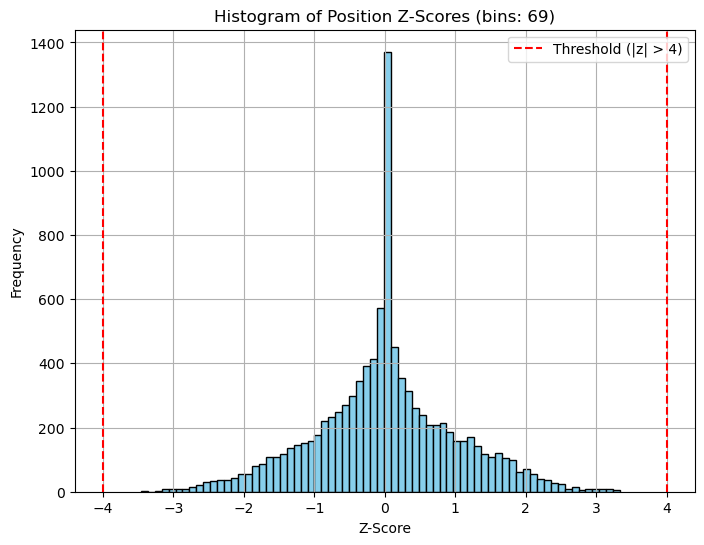

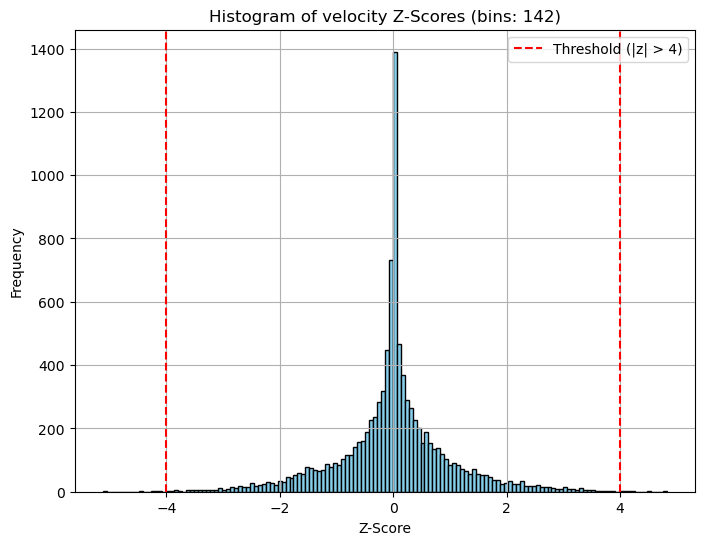

Number of bins calcualted using Freedman Diaconis Rule: 
position: 69
velocity: 142


In [9]:
##Visualize teh z_score analysis##
def plot_distributions(positions, velocities):

    num_bins = [ideal_bins(positions), ideal_bins(velocities)]

    # Plot histogram position
    plt.figure(figsize=(8, 6))
    plt.hist(positions, bins=num_bins[0], color='skyblue', edgecolor='black')
    plt.axvline(x=4, color='red', linestyle='--', label='Threshold (|z| > 4)')
    plt.axvline(x=-4, color='red', linestyle='--')
    plt.title('Histogram of Position Z-Scores (bins: '+str(num_bins[0])+')')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot histogram velocity 
    plt.figure(figsize=(8, 6))
    plt.hist(velocities, bins=num_bins[1], color='skyblue', edgecolor='black')
    plt.axvline(x=4, color='red', linestyle='--', label='Threshold (|z| > 4)')
    plt.axvline(x=-4, color='red', linestyle='--')
    plt.title('Histogram of velocity Z-Scores (bins: '+str(num_bins[1])+')')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("Number of bins calcualted using Freedman Diaconis Rule: ")
    print("position:", num_bins[0])
    print("velocity:", num_bins[1])
    
    return None

plot_distributions(data_normed_df['z_score_delta_position'], data_normed_df['z_score_delta_velocity'])


Using Moving Average

It is important to note that we are assuming that the propagation of TLEs follows a predictable trend which is the case for ISS Zarya.\
We can use any significant deviation from this trend to be flagged as an anomaly.   
We started with a window of about 7 which given our frequency of TLE data (0.35 days).  
Should give us a moving average of 2.45 days which should give us a meaningful baseline.  
We adjusted the window size as needed

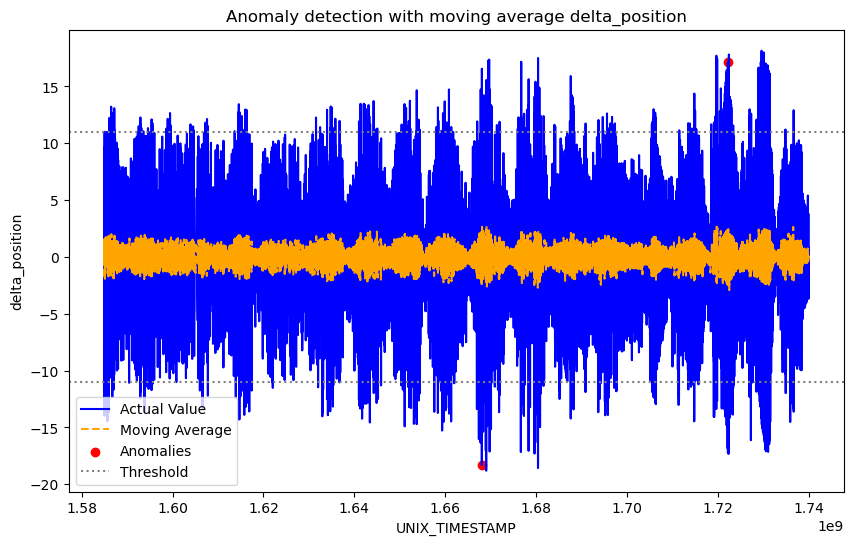

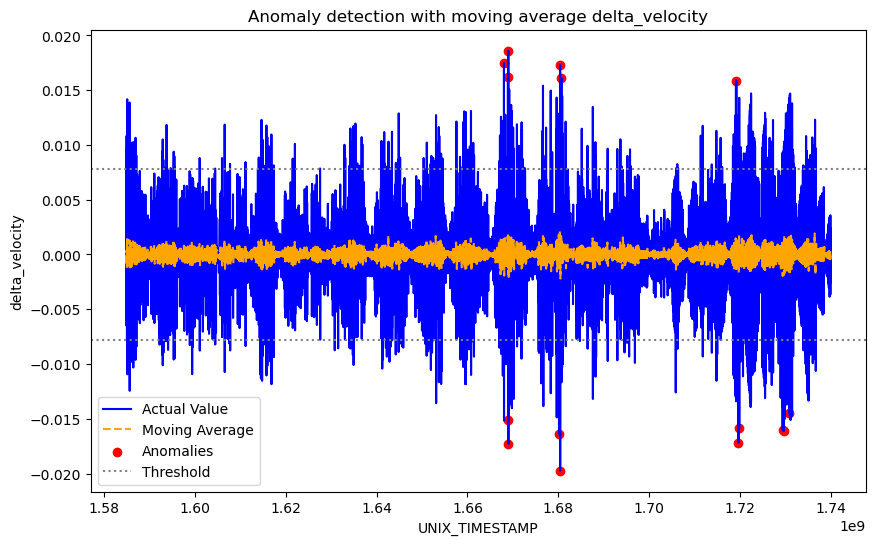

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,velocity_y,velocity_z,UNIX_TIMESTAMP,position_magnitude,velocity_magnitude,delta_position,delta_velocity,moving_avg,ma_residual,is_anomaly
589,867744,15.51204847,0.0008846,51.639,335.1539,138.7527,221.4132,48047,0.00042568,0.00025006,...,4.312828,6.007066,1.730812e+09,6796.603108,7.658829,15.663316,-0.014431,0.001603,-0.016034,True
680,128,15.50203794,0.0009623,51.6412,47.0803,90.3106,242.017,47821,0.00083378,0.00047839,...,5.473589,5.311928,1.729558e+09,6800.387606,7.654737,18.146075,-0.016125,0.001084,-0.017209,True
703,848960,15.50011867,0.0009638,51.6352,60.6247,85.6128,123.4615,47779,-0.0036926,-0.00206298,...,1.211719,-5.243587,1.729323e+09,6801.566505,7.653593,15.637773,-0.016046,0.000231,-0.016277,True
1464,34304,15.49479751,0.0009448,51.6377,247.0408,18.5707,162.3461,46068,0.00050843,0.00028178,...,1.731222,-6.002338,1.719789e+09,6803.350423,7.654063,17.435490,-0.015821,0.000159,-0.015980,True
1477,916032,15.49863503,0.0011241,51.6403,256.9468,18.2205,153.2692,46037,0.00034608,0.00019289,...,2.162625,-5.938177,1.719616e+09,6801.923101,7.654898,17.706180,-0.017184,-0.000350,-0.016834,True
1525,902752,15.49634318,0.0010689,51.64,289.0369,354.6215,5.4658,45937,0.0003189,0.00017584,...,1.549957,6.015500,1.719056e+09,6789.447764,7.669479,-14.067642,0.015884,0.000266,0.015618,True
4294,48864,15.49517154,0.000685,51.6427,330.0338,156.0082,353.0104,39047,0.00035655,0.00019613,...,-1.562742,-5.157735,1.680673e+09,6788.859104,7.668559,-14.830966,0.016097,-0.000614,0.016711,True
4311,298368,15.49389682,0.0007082,51.6424,345.8486,143.7445,173.6379,38997,0.0004216,0.00023181,...,2.113694,4.409951,1.680397e+09,6805.234967,7.648996,17.504369,-0.019744,0.000305,-0.020049,True
4312,257376,15.49385665,0.0007132,51.6423,346.3693,143.3495,306.621,38996,0.00042772,0.00023522,...,1.813027,0.008293,1.680388e+09,6786.661775,7.666294,-18.573192,0.017298,0.000144,0.017155,True
4328,375424,15.49802746,0.0005588,51.6427,0.5328,147.8833,171.3701,38951,0.00064198,0.00036111,...,3.637691,4.541322,1.680141e+09,6802.919743,7.651138,12.489514,-0.016391,-0.000407,-0.015984,True


In [10]:
def ma_anomaly(data, quantity, window_size,thresh): 
    data['moving_avg'] = data[quantity].rolling(window = window_size, center = True).mean()
    data['ma_residual'] = data[quantity] - data['moving_avg']
    threshold = thresh * data['ma_residual'].std()
    data['is_anomaly'] = data['ma_residual'].abs() > threshold
    return data

def visual_ma(ma_data, time, value):
    plt.figure(figsize=(10,6))
    plt.plot(ma_data[time], ma_data[value], label ='Actual Value', color = 'blue')
    plt.plot(ma_data[time], ma_data['moving_avg'], label ='Moving Average', color = 'orange', linestyle = '--')
    plt.scatter(ma_data[ma_data['is_anomaly']][time], ma_data[ma_data['is_anomaly']][value], color = 'red', label = 'Anomalies')    
    plt.axhline(y=ma_data['ma_residual'].std() * 2, color='gray', linestyle=':', label='Threshold')
    plt.axhline(y=-ma_data['ma_residual'].std() * 2, color='gray', linestyle=':')
    plt.legend()
    plt.title("Anomaly detection with moving average " + str(value))
    plt.xlabel(time)
    plt.ylabel(value)
    plt.show()

# #position magnitude moving average
# ma_anomaly_df_pos = ma_anomaly(data_df.copy(), 'position_magnitude', window_size=6, thresh=3.5)
# visual_ma(ma_anomaly_df_pos, 'UNIX_TIMESTAMP', 'position_magnitude')

# #velocity magnitude moving average
# ma_anomaly_df_vel = ma_anomaly(data_df.copy(), 'velocity_magnitude', window_size=6, thresh=3.5)
# visual_ma(ma_anomaly_df_vel, 'UNIX_TIMESTAMP', 'velocity_magnitude')

#delta_position moving average
ma_anomaly_df_delpos = ma_anomaly(data_df.copy(), 'delta_position', window_size=7, thresh=3.5)
visual_ma(ma_anomaly_df_delpos, 'UNIX_TIMESTAMP', 'delta_position')

#delta_position moving average
ma_anomaly_df_delvel = ma_anomaly(data_df.copy(), 'delta_velocity', window_size=9, thresh=4)
visual_ma(ma_anomaly_df_delvel, 'UNIX_TIMESTAMP', 'delta_velocity')


# anomaly_dfs = [ma_anomaly_df_pos[ma_anomaly_df_pos['is_anomaly']], ma_anomaly_df_vel[ma_anomaly_df_vel['is_anomaly']],
#                ma_anomaly_df_delpos[ma_anomaly_df_delpos['is_anomaly']], ma_anomaly_df_delvel[ma_anomaly_df_delvel['is_anomaly']]]

anomaly_delta_dfs = [ma_anomaly_df_delpos[ma_anomaly_df_delpos['is_anomaly']], ma_anomaly_df_delvel[ma_anomaly_df_delvel['is_anomaly']]]

# [len(x) for x in anomaly_delta_dfs]
anomaly_delta_dfs[1]

Similar to our exploration using z-score, our moving average analysis for delta_v was more insightful for anomalies  
We are able to detect more anomalies in the changes in velocity which makes sense.  
We expect the spacecraft to make sudden thrusts or be affected by sudden perturbations for anomalies.  

We have similar anomaly data points for the moving average and z-score analysis.  
Therefore, both methods are more likely to be valid statistical methods to create anomalies.   
Additionally, we can use our "is_anomaly" as our labels for training machine learning models.  
Since z-score is already normalized, we will use that dataset and anomaly detection for training.  

In [ ]:
normed_data = (data_normed_df.copy()).drop(columns = ['z_score_position_magnitude', 'z_score_velocity_magnitude',
                                             'z_score_delta_position', 'z_score_delta_velocity', 'is_mag_anomaly'])
normed_data.rename(columns = {'is_delta_anomaly':'is_anomaly'}, inplace = True)
normed_data

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,position_z,velocity_x,velocity_y,velocity_z,UNIX_TIMESTAMP,position_magnitude,velocity_magnitude,delta_position,delta_velocity,is_anomaly
0,1.308893,0.998304,0.017784,-2.286683,-0.061179,1.628305,-1.313368,1.625107,0.104430,0.117643,...,-1.303404,-0.088689,-1.072418,1.534341,1.624880,0.040143,0.679836,0.023485,-0.025860,False
1,0.749933,0.988275,0.009075,-2.249000,-0.055091,1.615132,-1.300316,1.624860,0.108325,0.122165,...,-1.302948,-0.076692,-1.073611,1.534331,1.624634,0.054837,0.660563,0.011653,-0.015825,False
2,0.749933,0.988275,0.009075,-2.249000,-0.055091,1.615132,-1.300316,1.624860,0.108325,0.122165,...,-1.302948,-0.076692,-1.073611,1.534331,1.624634,0.054837,0.660563,0.000058,0.000021,False
3,-0.261546,0.967117,-0.110770,-1.269248,-0.046797,1.620837,-0.439995,1.624490,0.083793,0.093264,...,1.020281,1.715747,-0.056333,-0.011752,1.624297,-0.806829,-0.127143,-0.679873,-0.647652,False
4,0.513163,0.967895,-0.015806,-2.211317,-0.039848,1.598975,-1.284303,1.624244,0.123785,0.140204,...,-1.302749,-0.047266,-1.075957,1.534313,1.624017,0.081477,0.626305,0.701011,0.619527,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.177872,-1.248345,0.252911,0.878671,-1.218480,-1.009489,-0.654351,-1.804242,-0.088023,-0.108821,...,0.027368,0.123324,-1.320458,-1.048107,-1.804468,0.768640,-0.418040,-0.718188,0.771225,False
9994,-1.362955,-1.247977,0.253326,0.840988,-1.215557,-1.009779,-0.517019,-1.804365,-0.086434,-0.107056,...,-0.517342,0.469728,-1.077893,-1.218203,-1.804586,1.383847,-0.906454,0.485512,-0.401566,False
9995,-1.121570,-1.251859,0.277378,0.916353,-1.207755,-1.024640,0.933823,-1.804735,-0.092509,-0.113821,...,-2.869167,0.063369,1.368023,1.166546,-1.804902,2.250335,-2.942149,0.683794,-1.673783,False
9996,-1.121570,-1.251859,0.277378,0.916353,-1.207755,-1.024640,0.933823,-1.804735,-0.092509,-0.113821,...,-2.869167,0.063369,1.368023,1.166546,-1.804902,2.250335,-2.942149,0.000058,0.000021,False


In [ ]:
#pickle the training data just in case(or not to run every cell to get our training data)#
# with open('training_data.pkl', 'wb') as f: 
#     pickle.dump(normed_data, f)
with open('training_data.pkl', 'rb') as f:
    normed_data = pickle.load(f)
normed_data 

,EPOCH_MICROSECONDS,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,...,position_z,velocity_x,velocity_y,velocity_z,UNIX_TIMESTAMP,position_magnitude,velocity_magnitude,delta_position,delta_velocity,is_anomaly
0,1.308893,0.998304,0.017784,-2.286683,-0.061179,1.628305,-1.313368,1.625107,0.104430,0.117643,...,-1.303404,-0.088689,-1.072418,1.534341,1.624880,0.040143,0.679836,0.023485,-0.025860,False
1,0.749933,0.988275,0.009075,-2.249000,-0.055091,1.615132,-1.300316,1.624860,0.108325,0.122165,...,-1.302948,-0.076692,-1.073611,1.534331,1.624634,0.054837,0.660563,0.011653,-0.015825,False
2,0.749933,0.988275,0.009075,-2.249000,-0.055091,1.615132,-1.300316,1.624860,0.108325,0.122165,...,-1.302948,-0.076692,-1.073611,1.534331,1.624634,0.054837,0.660563,0.000058,0.000021,False
3,-0.261546,0.967117,-0.110770,-1.269248,-0.046797,1.620837,-0.439995,1.624490,0.083793,0.093264,...,1.020281,1.715747,-0.056333,-0.011752,1.624297,-0.806829,-0.127143,-0.679873,-0.647652,False
4,0.513163,0.967895,-0.015806,-2.211317,-0.039848,1.598975,-1.284303,1.624244,0.123785,0.140204,...,-1.302749,-0.047266,-1.075957,1.534313,1.624017,0.081477,0.626305,0.701011,0.619527,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.177872,-1.248345,0.252911,0.878671,-1.218480,-1.009489,-0.654351,-1.804242,-0.088023,-0.108821,...,0.027368,0.123324,-1.320458,-1.048107,-1.804468,0.768640,-0.418040,-0.718188,0.771225,False
9994,-1.362955,-1.247977,0.253326,0.840988,-1.215557,-1.009779,-0.517019,-1.804365,-0.086434,-0.107056,...,-0.517342,0.469728,-1.077893,-1.218203,-1.804586,1.383847,-0.906454,0.485512,-0.401566,False
9995,-1.121570,-1.251859,0.277378,0.916353,-1.207755,-1.024640,0.933823,-1.804735,-0.092509,-0.113821,...,-2.869167,0.063369,1.368023,1.166546,-1.804902,2.250335,-2.942149,0.683794,-1.673783,False
9996,-1.121570,-1.251859,0.277378,0.916353,-1.207755,-1.024640,0.933823,-1.804735,-0.092509,-0.113821,...,-2.869167,0.063369,1.368023,1.166546,-1.804902,2.250335,-2.942149,0.000058,0.000021,False
